# Homework: Significance Test

<img src="https://i.dlpng.com/static/png/5251081-redpill-red-pill-png-384_269_preview.png" width="200" align="right">

## Objectives

- Practice working with Jupyter Notebooks
- Understand the basic concepts of statistical significance
- Use the _shuffling_ method for hypothesis testing

Recommended source: https://www.youtube.com/watch?v=Iq9DzN6mvYA

## Background

Your professor is conducting a [randomized control trial](https://en.wikipedia.org/wiki/Randomized_controlled_trial) to verify the effectiveness of a new wonder supplement ( _Pythonifin_ ) on algorithmic thinking and problem solving. The instructor first seeks [IRB](https://en.wikipedia.org/wiki/Institutional_review_board) approval and he follows the ethical guidelines for human subject research by making the participation completely voluntary, offering no rewards (or punishment) for taking (or not taking) part in the study, and assigning the participants to the treatment (i.e. taking _Pythonifin_ ) and to the control (i.e. taking a placebo) groups completely randomly.

By the beginning of the trial 35 students decide to enroll to the study. Since there are 20 doses of _Pythonifin_ are availaable, the professor decides to assing 20 students to the treatment group and the remaining 15 students to the control group. Each test subject is given a pill 30 minutes before taking a test exam (this exam score will not be used in the final semester grade). All tests are evaluated without knowing the group assignments (blind study). The anonymized test scores are shown in the following table:

| Pythofinin | Placebo |
|------------|---------|
|          91|       84|
|          87|       92|
|          71|       78|
|         100|      100|
|          91|       82|
|          97|       85|
|         100|       78|
|          80|       87|
|         100|      100|
|          79|       85|
|          83|       93|
|          94|       76|
|          83|       86|
|          79|       89|
|          99|       88|
|          95|         |
|          90|         |
|          97|         |
|         100|         |
|          91|         |

While, at first glance, the results show a slight advantage in using _Pythonifin_ , the professor has heard about rigorous significance testing. Unfortunately, he has very limited background in statistical techniques. He decides to do a [permutation test](https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests) to see if the results are significant at a _p value_ of 5%. In a nutshell, he wants to know, that the chance of getting this particular result by accident is less than 5%.

In this assignment you are going to follow the thought process of your professor. **Try to understand each step, and make sure you provide code solutions and/or text inputs for each `#TODO` item (replacing `#TODO` with your input).**

## Step 1: Setup (10 pts)
Please, provide your VUnetID. Also, if you need to import any additional Python modules (you can come back here later), add those import statements in the following code cell.

**VUnetID** : malcolkd

In [1]:
# Import statements
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import numpy as np

## Step 2: Data Preparation (10 pts)

Using the results table above, create two Python lists, named `pythonifin` and `placebo`, containing the test scores for each subject.

In [2]:
pythonifin = [91, 87, 71, 100, 91, 97, 100, 80, 100, 79, 83, 94, 83, 79, 
              99, 95, 90, 97, 100, 91]
placebo = [84, 92, 78, 100, 82, 85, 78, 87, 100, 85, 93, 76, 86, 89, 88]

## Step 3: Initial Observations (15 pts)

Compute the average (mean) scores for both groups. Print these values and the difference between them (the actual formating is up to you).

In [3]:
py_mean = statistics.mean(pythonifin)
pla_mean = statistics.mean(placebo)
d_mean = py_mean - pla_mean

print(f"Pythonifin mean: {py_mean:0.4}")
print(f"Placebo Mean: {pla_mean:0.4}")
print(f"Difference of Means: {d_mean:0.4}")

Pythonifin mean: 90.35
Placebo Mean: 86.87
Difference of Means: 3.483


## Step 4: Initial Conclusion

Please, provide your initial assesment in plain english on the effectiveness of _Pythofinin_. Please, be honest and do not come back later to re-assess you conclusions here. _This answer will not be graded_ .


**Your initial assessment**: Just based on mean, with no statistical analysis conducted, it would appear that Pythonifin makes students perform better on average.


## Step 5: Getting some insights (15 pts)

Use the [`plt.hist()`](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) function to plot the histograms of the two groups. You should have a single figure with two overlapping histogram plots in different colors. (Hint: you may want to use the `alpha=` optional parameter to control the transparency.)

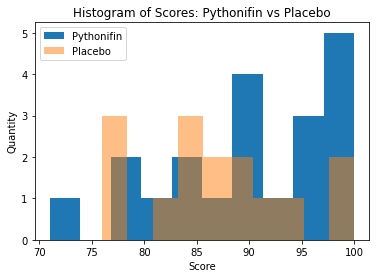

In [4]:
plt.hist(pythonifin, label='Pythonifin')
plt.hist(placebo, alpha=0.5, label='Placebo')
plt.legend()
plt.title('Histogram of Scores: Pythonifin vs Placebo')
plt.xlabel('Score')
plt.ylabel('Quantity')
plt.show()

## Step 5: Intermediate Conclusion

Based on the histograms do you have a _second opinion_ (in plain english) on the results? Again, do this now, and do not come back later. _This answer will not be graded_ .


**Your intermediate assessment**: It still appears that the Pythonifin helps performance, as there were lots of high scorers and 1 low scorer.  It may instead be possible that it just increases the variance.


## Step 6: Significance Test with Permutation (40 pts)

Use the permutation (a.k.a shuffling) approach to test the significance of your results. 

- Run `1000` experiments where you _randomly_ (re)assign all the test scores to the two treatment groups. Make sure, you keep the group sizes the same (20 vs. 15). 
- Store the difference of the means of the two random groups in a Python list (`1000` difference of means from the `1000` experiments).
- Compute the number of experiments, when the difference between the two group mean scores were _at least_ as high as in the original non-shuffled case (i.e. Step 3) and compute the ratio of this count to the total number of experiments (this is your estimated _p-value_ ).
- Make a histogram plot of the difference of means.
- Print your _p-value_ (actual formating is up to you). Note: the _p-value_ is the area of the tail section of your histogram beyond the x-axis coordinate of the original difference of means.

The p value for this shuffled case study was 0.098


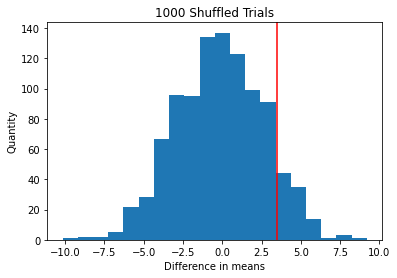

In [5]:
#TODO
np.random.seed(0)
num_trials = 1000
delta_means = [0] * num_trials

all_scores = pythonifin + placebo

for idx in range(num_trials):
    # Make a separate object
    shuffled_scores = list(tuple(all_scores))

    np.random.shuffle(shuffled_scores)
    py = shuffled_scores[0:20]
    pla = shuffled_scores[20:]
    delta_means[idx] = statistics.mean(py) - statistics.mean(pla)
    
higher_deltas = [delta for delta in delta_means if delta >= d_mean]
ratio = len(higher_deltas) / num_trials
print(f'The p value for this shuffled case study was {ratio}')

plt.hist(delta_means, bins=20)
plt.title(f'{num_trials} Shuffled Trials')
plt.xlabel('Difference in means')
plt.ylabel('Quantity')
plt.axvline(d_mean, color='red')
plt.show()

## Step 7: Final Conclusion (10 pts)

Please, provide your **final assesment** in plain english on the effectiveness of _Pythofinin_. You should reject the hypothesis that the supplement works if your test result (difference of the two origianlly observed means) can happen accidentally by more than 5% chance. (Note: 5% is an arbitrary but widely accepted threshold).


**Your final assessment**: Given that the calculated p-value from the shuffling test was 0.098, which is greater than 5%, this indicates that we should reject the null hypothesis that the supplement works, and thus the final conclusion is that Pythonifin actually does not work.

## Grading

In this assignment you will not have access to an autograder program (i.e. _validator_ ). Your work will be inspected and graded manually. Make sure you took care of every `#TODO` items in your assignment. Also, verify, that your notebook document can be executed sequentially from a clean state. You can do this by using the _"Kernel/Restart & Run All"_ menu item and checking your results.

### Penalties

Your work will not be checked for PEP8 style problems. Still, try to write readable and concise code.

## Submission

Please, upload the final version of this notebook file (`significance.ipynb`) to Brightspace.